In [1]:
import pandas as pd
import os

import statistics
import numpy as np


In [2]:
NUMBER_OF_CLIENTS = 19
NUMBER_OF_ITERATIONS = 130
inputFolders = "result_unbalanced_epoch_1_rounds_200/"

In [16]:
file = inputFolders+"global_model_MLP_metrics.csv" # local_model_results_MLP_unbalanced_client_0_round_1

dataGeral = pd.read_csv(file)

dataGeral

,client,round,loss,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
0,-1,0,0.437544,awake,0.813660,0.813660,1.000000,0.897258,0.000000,0.500000,[[ 0 25135][ 0 109753]],0.0,25135.0,0.0,109753.0
1,-1,0,0.437544,asleep,0.813660,0.000000,0.000000,0.000000,0.000000,0.500000,[[ 109753 0][ 25135 0]],109753.0,0.0,25135.0,0.0
2,-1,0,0.437544,avg,0.813660,0.406830,0.500000,0.448629,0.000000,0.500000,NaN,NaN,NaN,NaN,NaN
3,-1,1,0.425515,awake,0.825900,0.842748,0.966343,0.900323,0.237665,0.589497,[[ 5345 19790][ 3694 106059]],5345.0,19790.0,3694.0,106059.0
4,-1,1,0.425515,asleep,0.825900,0.591326,0.212652,0.312811,0.237665,0.589497,[[ 106059 3694][ 19790 5345]],106059.0,3694.0,19790.0,5345.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,-1,157,0.709710,asleep,0.842692,0.598273,0.474239,0.529084,0.436171,0.700656,[[ 101749 8004][ 13215 11920]],101749.0,8004.0,13215.0,11920.0
473,-1,157,0.709710,avg,0.842692,0.741662,0.700656,0.717329,0.436171,0.700656,NaN,NaN,NaN,NaN,NaN
474,-1,158,0.738821,awake,0.839786,0.910520,0.890618,0.900459,0.490398,0.754221,[[ 15529 9606][ 12005 97748]],15529.0,9606.0,12005.0,97748.0
475,-1,158,0.738821,asleep,0.839786,0.563994,0.617824,0.589683,0.490398,0.754221,[[ 97748 12005][ 9606 15529]],97748.0,12005.0,9606.0,15529.0


In [17]:
ss1 = dataGeral.loc[dataGeral['accuracy'] == dataGeral['accuracy'].max()]

ss1

,client,round,loss,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
444,-1,148,0.649769,awake,0.844493,0.890995,0.921633,0.906055,0.455666,0.714646,[[ 12760 12375][ 8601 101152]],12760.0,12375.0,8601.0,101152.0
445,-1,148,0.649769,asleep,0.844493,0.597350,0.507659,0.548864,0.455666,0.714646,[[ 101152 8601][ 12375 12760]],101152.0,8601.0,12375.0,12760.0
446,-1,148,0.649769,avg,0.844493,0.744173,0.714646,0.727460,0.455666,0.714646,NaN,NaN,NaN,NaN,NaN


In [18]:
dataGeralFiltered = dataGeral[:NUMBER_OF_ITERATIONS*3]

dataGeralFiltered

,client,round,loss,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
0,-1,0,0.437544,awake,0.813660,0.813660,1.000000,0.897258,0.000000,0.500000,[[ 0 25135][ 0 109753]],0.0,25135.0,0.0,109753.0
1,-1,0,0.437544,asleep,0.813660,0.000000,0.000000,0.000000,0.000000,0.500000,[[ 109753 0][ 25135 0]],109753.0,0.0,25135.0,0.0
2,-1,0,0.437544,avg,0.813660,0.406830,0.500000,0.448629,0.000000,0.500000,NaN,NaN,NaN,NaN,NaN
3,-1,1,0.425515,awake,0.825900,0.842748,0.966343,0.900323,0.237665,0.589497,[[ 5345 19790][ 3694 106059]],5345.0,19790.0,3694.0,106059.0
4,-1,1,0.425515,asleep,0.825900,0.591326,0.212652,0.312811,0.237665,0.589497,[[ 106059 3694][ 19790 5345]],106059.0,3694.0,19790.0,5345.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,-1,128,0.571452,asleep,0.827902,0.549718,0.422518,0.477797,0.376876,0.671629,[[ 101054 8699][ 14515 10620]],101054.0,8699.0,14515.0,10620.0
386,-1,128,0.571452,avg,0.827902,0.712061,0.671629,0.687386,0.376876,0.671629,NaN,NaN,NaN,NaN,NaN
387,-1,129,0.577085,awake,0.827627,0.877586,0.915911,0.896339,0.386452,0.679022,[[ 11113 14022][ 9229 100524]],11113.0,14022.0,9229.0,100524.0
388,-1,129,0.577085,asleep,0.827627,0.546308,0.442132,0.488731,0.386452,0.679022,[[ 100524 9229][ 14022 11113]],100524.0,9229.0,14022.0,11113.0


In [19]:
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dataGeralFiltered.loc[dataGeralFiltered['class'] == "avg"]

ss1 = ss.loc[ss['accuracy'] == ss['accuracy'].max()]
ss1

,client,round,loss,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
80,-1,26,0.431202,avg,0.842062,0.739335,0.731817,0.735446,0.470943,0.731817,NaN,NaN,NaN,NaN,NaN


In [21]:
dataGeralFiltered[78:81]

,client,round,loss,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
78,-1,26,0.431202,awake,0.842062,0.899264,0.907556,0.903391,0.470943,0.731817,[[ 13977 11158][ 10146 99607]],13977.0,11158.0,10146.0,99607.0
79,-1,26,0.431202,asleep,0.842062,0.579406,0.556077,0.567502,0.470943,0.731817,[[ 99607 10146][ 11158 13977]],99607.0,10146.0,11158.0,13977.0
80,-1,26,0.431202,avg,0.842062,0.739335,0.731817,0.735446,0.470943,0.731817,NaN,NaN,NaN,NaN,NaN


In [6]:
allData = []

dataGeralFilteredAvg = dataGeralFiltered.loc[dataGeralFiltered['class'] == "avg"]

df = pd.DataFrame(columns=["round","min_accuracy","max_accuracy","global_accuracy","median","avg","sd","clients"])
# pegar acurática
for iterationI in range(0,NUMBER_OF_ITERATIONS):
    countCli = 0
    itetarionAccuracy = []
    for clientI in range(0,NUMBER_OF_CLIENTS):
        file = inputFolders+"local_model_results_MLP_client_"+str(clientI)+"_round_" +str(iterationI)+".csv" # local_model_results_MLP_unbalanced_client_0_round_1
        
        if(os.path.isfile(file)):
            dataF = pd.read_csv(file)
            accuracy = dataF['accuracy'][0]
            itetarionAccuracy.append(accuracy)
            countCli = countCli + 1
    # global accuracy local_model_results_MLP_client_0_round_0
    #file = inputFolders+"global_model_MLP_unbalanced_client_0_round_" +str(iterationI)+".csv" # local_model_results_MLP_unbalanced_client_0_round_1
    #dataF = pd.read_csv(file)
    accuracySeries = dataGeralFilteredAvg[iterationI:(iterationI+1)]['accuracy']
    global_accuracy = accuracySeries.values[0]
    # global_model_MLP_unbalanced_client_0_round_1
    # iterationI
    minAcc = min(itetarionAccuracy)
    maxAcc = max(itetarionAccuracy)
    avgAcc = sum(itetarionAccuracy)/len(itetarionAccuracy)
    sd = np.std(itetarionAccuracy)
    median = statistics.median(itetarionAccuracy)

    # countCli
    print("Round ",iterationI,"Clients: ",countCli)
    ## add on dataframe
    values = [[iterationI,minAcc,maxAcc,global_accuracy,median,avgAcc,sd,countCli]]
    dfConc = pd.DataFrame(values,
                          columns=["round","min_accuracy","max_accuracy","global_accuracy","avg","median","sd","clients"])
    # append
    df = pd.concat([df,dfConc])

Round  0 Clients:  19
Round  1 Clients:  19
Round  2 Clients:  19
Round  3 Clients:  19
Round  4 Clients:  19
Round  5 Clients:  19
Round  6 Clients:  19
Round  7 Clients:  19
Round  8 Clients:  19
Round  9 Clients:  19
Round  10 Clients:  19
Round  11 Clients:  19
Round  12 Clients:  19
Round  13 Clients:  19
Round  14 Clients:  19
Round  15 Clients:  19
Round  16 Clients:  19
Round  17 Clients:  19
Round  18 Clients:  19
Round  19 Clients:  19
Round  20 Clients:  19
Round  21 Clients:  19
Round  22 Clients:  19
Round  23 Clients:  19
Round  24 Clients:  19
Round  25 Clients:  19
Round  26 Clients:  19
Round  27 Clients:  19
Round  28 Clients:  19
Round  29 Clients:  19
Round  30 Clients:  19
Round  31 Clients:  19
Round  32 Clients:  19
Round  33 Clients:  19
Round  34 Clients:  19
Round  35 Clients:  19
Round  36 Clients:  19
Round  37 Clients:  19
Round  38 Clients:  19
Round  39 Clients:  19
Round  40 Clients:  19
Round  41 Clients:  19
Round  42 Clients:  19
Round  43 Clients:  1

In [7]:
itetarionAccuracy

[0.8173447600972659,
 0.5734387047031612,
 0.8377839392681335,
 0.8266487752802325,
 0.8124666389893838,
 0.7695717928948461,
 0.6884822964236996,
 0.8211701559812585,
 0.786422810034992,
 0.8381916849534429,
 0.7616244588102722,
 0.8307039914595813,
 0.8171223533598244,
 0.8182269734891169,
 0.8254848466876223,
 0.5111870588933041,
 0.8094789751497539,
 0.8132895439179171,
 0.8254774331297076]

In [8]:
max(itetarionAccuracy)

0.8381916849534429

In [ ]:
ss1 = dataGeral.loc[dataGeral['accuracy'] == dataGeral['accuracy'].max()]

ss1

In [14]:
x = ss[iterationI:(iterationI+1)]['accuracy']
x.values[0]

0.8276273649249748

In [52]:
df

,round,min_accuracy,max_accuracy,global_accuracy,median,avg,sd,clients
0,0,0.530129,0.818724,"2 0.81366 Name: accuracy, dtype: float64",0.780775,0.813119,0.073168,19
0,1,0.544378,0.825136,"5 0.8259 Name: accuracy, dtype: float64",0.783863,0.812652,0.069033,19
0,2,0.556150,0.830741,"8 0.834233 Name: accuracy, dtype: float64",0.787826,0.808760,0.059646,19
0,3,0.547098,0.837309,"11 0.838325 Name: accuracy, dtype: float64",0.787535,0.812919,0.064309,19
0,4,0.542042,0.841142,"14 0.840015 Name: accuracy, dtype: float64",0.790689,0.814387,0.065924,19
...,...,...,...,...,...,...,...,...
0,125,0.509208,0.838562,"377 0.826708 Name: accuracy, dtype: float64",0.782132,0.816188,0.081348,19
0,126,0.503796,0.837272,"380 0.825833 Name: accuracy, dtype: float64",0.784340,0.817686,0.080152,19
0,127,0.501438,0.839193,"383 0.827123 Name: accuracy, dtype: float64",0.782568,0.815276,0.080098,19
0,128,0.481303,0.836361,"386 0.827902 Name: accuracy, dtype: float64",0.779934,0.815521,0.088045,19


In [6]:
dfConc

,round,min_accuracy,max_accuracy,global_accuracy,avg,median,sd,clients
0,119,0.579762,0.835879,0.823809,0.810839,0.76828,0.081782,14


In [7]:
df

,round,min_accuracy,max_accuracy,global_accuracy,median,avg,sd,clients
0,0,0.802799,0.813660,0.809383,0.808230,0.808230,0.005430,2
0,1,0.588459,0.827976,0.817619,0.769188,0.802659,0.067264,19
0,2,0.518230,0.841179,0.823476,0.777331,0.805594,0.070377,19
0,3,0.557626,0.842062,0.833884,0.790477,0.811629,0.062154,19
0,4,0.543881,0.840305,0.839852,0.795457,0.812971,0.063384,19
...,...,...,...,...,...,...,...,...
0,115,0.579399,0.828250,0.825893,0.767563,0.812700,0.075479,14
0,116,0.646603,0.833425,0.822490,0.776679,0.809145,0.062014,14
0,117,0.630278,0.833388,0.824187,0.769300,0.811547,0.070669,14
0,118,0.603627,0.834107,0.822379,0.768169,0.810135,0.073842,14


In [64]:
print("Global accuracy",df["global_accuracy"].max())

print("local accuracy",df["max_accuracy"].max())

Global accuracy 0.8420615621849238
local accuracy 0.8455236937310955


In [65]:

from datetime import datetime
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt


<AxesSubplot: xlabel='round'>

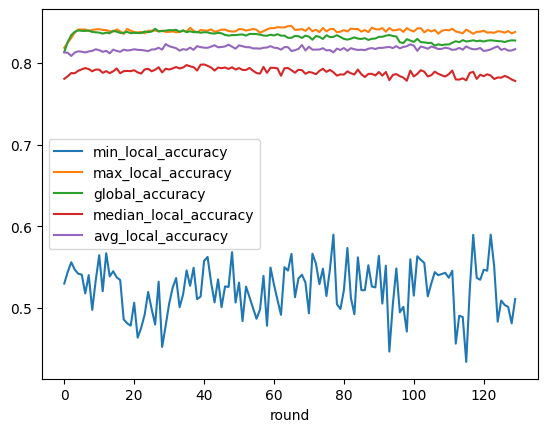

In [66]:
metrics = ["round","min_accuracy","max_accuracy","global_accuracy","median","avg"]
metrics = ["round","min_local_accuracy","max_local_accuracy","global_accuracy","median_local_accuracy","avg_local_accuracy"]

df['min_local_accuracy'] = df['min_accuracy']
df['max_local_accuracy'] = df['max_accuracy']
df['median_local_accuracy'] = df['median']
df['avg_local_accuracy'] = df['avg']

dfMetricsClass = df[metrics]
lines = dfMetricsClass.plot.line(x='round')

lines

In [67]:
lines.figure.savefig('metrics_flower_isabela_unbalanced_fix.pdf')